# Explore Your Dataset With Python and Pandas

## Environment Setup

### Prerequisites

### Installing Dependencies

```console
$ python3 -m pip install requests pandas matplotlib
```

```console
$ conda install requests pandas matplotlib
```

### Hello Pandas

In [1]:
import requests
from pathlib import Path

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
filename = download_url.split("/")[-1]
csv_path = Path("csv")
abs_path = csv_path / filename

response = requests.get(download_url)
response.raise_for_status()
with open(abs_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [2]:
import pandas as pd

nba = pd.read_csv(abs_path)
type(nba)
# Expected:
# <class 'pandas.core.frame.DataFrame'>

pandas.core.frame.DataFrame

In [3]:
len(nba)
# Expected:
# 126314

126314

In [4]:
nba.shape
# Expected:
# (126314, 23)

(126314, 23)

In [5]:
nba.head()

gameorder       game_id lg_id  _iscopy  year_id  date_game  seasongame  \
0          1  194611010TRH   NBA        0     1947  11/1/1946           1   
1          1  194611010TRH   NBA        1     1947  11/1/1946           1   
2          2  194611020CHS   NBA        0     1947  11/2/1946           1   
3          2  194611020CHS   NBA        1     1947  11/2/1946           2   
4          3  194611020DTF   NBA        0     1947  11/2/1946           1   

   is_playoffs team_id  fran_id  ...  win_equiv  opp_id  opp_fran  opp_pts  \
0            0     TRH  Huskies  ...  40.294830     NYK    Knicks       68   
1            0     NYK   Knicks  ...  41.705170     TRH   Huskies       66   
2            0     CHS    Stags  ...  42.012257     NYK    Knicks       47   
3            0     NYK   Knicks  ...  40.692783     CHS     Stags       63   
4            0     DTF  Falcons  ...  38.864048     WSC  Capitols       50   

   opp_elo_i  opp_elo_n  game_location  game_result  forecast notes  
0  1300.0000  1306.7233              H            L  0.640065   NaN  
1  1300.0000  1293.2767              A            W  0.359935   NaN  
2  1306.7233  1297.0712              H            W  0.631101   NaN  
3  1300.0000  1309.6521              A            L  0.368899   NaN  
4  1300.0000  1320.3811              H            L  0.640065   NaN  

[5 rows x 23 columns]

In [6]:
pd.set_option("display.max.columns", None)

In [7]:
pd.set_option("display.precision", 2)

In [8]:
nba.tail()

gameorder       game_id lg_id  _iscopy  year_id  date_game  \
126309      63155  201506110CLE   NBA        0     2015  6/11/2015   
126310      63156  201506140GSW   NBA        0     2015  6/14/2015   
126311      63156  201506140GSW   NBA        1     2015  6/14/2015   
126312      63157  201506170CLE   NBA        0     2015  6/16/2015   
126313      63157  201506170CLE   NBA        1     2015  6/16/2015   

        seasongame  is_playoffs team_id    fran_id  pts    elo_i    elo_n  \
126309         100            1     CLE  Cavaliers   82  1723.41  1704.39   
126310         102            1     GSW   Warriors  104  1809.98  1813.63   
126311         101            1     CLE  Cavaliers   91  1704.39  1700.74   
126312         102            1     CLE  Cavaliers   97  1700.74  1692.09   
126313         103            1     GSW   Warriors  105  1813.63  1822.29   

        win_equiv opp_id   opp_fran  opp_pts  opp_elo_i  opp_elo_n  \
126309      60.31    GSW   Warriors      103    1790.96    1809.98   
126310      68.01    CLE  Cavaliers       91    1704.39    1700.74   
126311      60.01    GSW   Warriors      104    1809.98    1813.63   
126312      59.29    GSW   Warriors      105    1813.63    1822.29   
126313      68.52    CLE  Cavaliers       97    1700.74    1692.09   

       game_location game_result  forecast notes  
126309             H           L      0.55   NaN  
126310             H           W      0.77   NaN  
126311             A           L      0.23   NaN  
126312             H           L      0.48   NaN  
126313             A           W      0.52   NaN

#### Exercise

Can you print the last 3 lines of our `DataFrame`?

## Getting to Know Your Data

### Displaying Data Types With `.info()`

In [9]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

### Showing Basics Statistics With `.describe()`

In [10]:
nba.describe()

gameorder   _iscopy    year_id  seasongame  is_playoffs        pts  \
count  126314.00  126314.0  126314.00   126314.00    126314.00  126314.00   
mean    31579.00       0.5    1988.20       43.53         0.06     102.73   
std     18231.93       0.5      17.58       25.38         0.24      14.81   
min         1.00       0.0    1947.00        1.00         0.00       0.00   
25%     15790.00       0.0    1975.00       22.00         0.00      93.00   
50%     31579.00       0.5    1990.00       43.00         0.00     103.00   
75%     47368.00       1.0    2003.00       65.00         0.00     112.00   
max     63157.00       1.0    2015.00      108.00         1.00     186.00   

           elo_i      elo_n  win_equiv    opp_pts  opp_elo_i  opp_elo_n  \
count  126314.00  126314.00  126314.00  126314.00  126314.00  126314.00   
mean     1495.24    1495.24      41.71     102.73    1495.24    1495.24   
std       112.14     112.46      10.63      14.81     112.14     112.46   
min      1091.64    1085.77      10.15       0.00    1091.64    1085.77   
25%      1417.24    1416.99      34.10      93.00    1417.24    1416.99   
50%      1500.95    1500.95      42.11     103.00    1500.95    1500.95   
75%      1576.06    1576.29      49.64     112.00    1576.06    1576.29   
max      1853.10    1853.10      71.11     186.00    1853.10    1853.10   

        forecast  
count  126314.00  
mean        0.50  
std         0.22  
min         0.02  
25%         0.33  
50%         0.50  
75%         0.67  
max         0.98

In [11]:
import numpy as np

nba.describe(include=object)

game_id   lg_id  date_game team_id fran_id  opp_id opp_fran  \
count         126314  126314     126314  126314  126314  126314   126314   
unique         63157       2      12426     104      53     104       53   
top     194611010TRH     NBA  4/13/2011     BOS  Lakers     BOS   Lakers   
freq               2  118016         30    5997    6024    5997     6024   

       game_location game_result           notes  
count         126314      126314            5424  
unique             3           2             231  
top                H           L  at New York NY  
freq           63138       63157             440

### A Mini Data Exploration With Pandas

In [12]:
nba["team_id"].value_counts()
# Expected:
# BOS    5997
# NYK    5769
# LAL    5078

# SDS      11

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [13]:
nba["fran_id"].value_counts()
# Expected:
# Lakers          6024
# Celtics         5997
# Knicks          5769

# Falcons           60
# Name: fran_id, dtype: int64

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

In [14]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()
# Expected:
# LAL    5078
# MNL     946
# Name: team_id, dtype: int64

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [15]:
nba["date_played"] = pd.to_datetime(nba["date_game"])

In [16]:
nba.loc[nba["team_id"] == "MNL", "date_played"].min()
# Expected:
# Timestamp('1948-11-04 00:00:00')

Timestamp('1948-11-04 00:00:00')

In [17]:
nba.loc[nba["team_id"] == "MNL", "date_played"].max()
# Expected:
# Timestamp('1960-03-26 00:00:00')

Timestamp('1960-03-26 00:00:00')

In [18]:
nba.loc[nba["team_id"] == "MNL", "date_played"].agg(("min", "max"))
# Expected:
# min   1948-11-04
# max   1960-03-26
# Name: date_played, dtype: datetime64[ns]

min   1948-11-04
max   1960-03-26
Name: date_played, dtype: datetime64[ns]

#### Exercise

Find out how many points the Boston Celtics have scored during all its matches contained in this dataset.

## Getting to Know Pandas' Data Structures

### `Series`: The Basic Building Block in Pandas

In [19]:
revenues = pd.Series([5555, 7000, 1980])
revenues
# Expected:
# 0    5555
# 1    7000
# 2    1980
# dtype: int64

0    5555
1    7000
2    1980
dtype: int64

In [20]:
revenues.values
# Expected:
# array([5555, 7000, 1980])

array([5555, 7000, 1980])

In [21]:
revenues.index
# Expected:
# RangeIndex(start=0, stop=3, step=1)

RangeIndex(start=0, stop=3, step=1)

In [22]:
type(revenues.values)
# Expected:
# <class 'numpy.ndarray'>

numpy.ndarray

In [23]:
city_revenues = pd.Series(
    [4200, 8000, 6500], index=["Amsterdam", "Toronto", "Tokyo"]
)
city_revenues
# Expected:
# Amsterdam    4200
# Toronto      8000
# Tokyo        6500
# dtype: int64

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

### `Pandas Series` vs Built-In Python Data Structures

In [24]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count
# Expected:
# Amsterdam    5
# Tokyo        8
# dtype: int64

Amsterdam    5
Tokyo        8
dtype: int64

In [25]:
city_employee_count.keys()
# Expected:
# Index(['Amsterdam', 'Tokyo'], dtype='object')

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [26]:
"Tokyo" in city_employee_count
# Expected:
# True

True

In [27]:
"New York" in city_employee_count
# Expected:
# False

False

### `DataFrame`: Pandas' Most Popular Data Structure

In [28]:
city_data = pd.DataFrame(
    {"revenue": city_revenues, "employee_count": city_employee_count}
)
city_data
# Expected:
# revenue  employee_count
# Amsterdam     4200             5.0
# Tokyo         6500             8.0
# Toronto       8000             NaN

revenue  employee_count
Amsterdam     4200             5.0
Tokyo         6500             8.0
Toronto       8000             NaN

In [29]:
city_data.index
# Expected:
# Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [30]:
city_data.values
# Expected:
# array([[4.2e+03, 5.0e+00],
#        [6.5e+03, 8.0e+00],
#        [8.0e+03,     nan]])

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

In [31]:
city_data.axes
# Expected:
# [Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
# Index(['revenue', 'employee_count'], dtype='object')]

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [32]:
city_data.axes[0]
# Expected:
# Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [33]:
city_data.axes[1]
# Expected:
# Index(['revenue', 'employee_count'], dtype='object')

Index(['revenue', 'employee_count'], dtype='object')

In [34]:
city_data.keys()
# Expected:
# Index(['revenue', 'employee_count'], dtype='object')

Index(['revenue', 'employee_count'], dtype='object')

In [35]:
"Amsterdam" in city_data
# Expected:
# False

False

In [36]:
"revenue" in city_data
# Expected:
# True

True

#### Exercise

Display the index and the axes of the `nba` dataset.  
Check whether it has a column "points". Or was it called "pts"?

## Accessing Elements for Python `list` and Pandas `Series`: Similarities and Differences

### The Benefits and Limitations of the Python Indexing Operator `[]`

In [37]:
city_revenues
# Expected:
# Amsterdam    4200
# Toronto      8000
# Tokyo        6500
# dtype: int64

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [38]:
city_revenues["Toronto"]
# Expected:
# 8000

8000

In [39]:
city_revenues[1]
# Expected:
# 8000

8000

In [40]:
city_revenues[-1]
# Expected:
# 6500

6500

In [41]:
city_revenues[1:]
# Expected:
# Toronto    8000
# Tokyo      6500
# dtype: int64

Toronto    8000
Tokyo      6500
dtype: int64

In [42]:
city_revenues["Toronto":]
# Expected:
# Toronto    8000
# Tokyo      6500
# dtype: int64

Toronto    8000
Tokyo      6500
dtype: int64

### Accessing `Series`' Elements via `.loc` and `.iloc`

In [43]:
colors = pd.Series(
    ["red", "purple", "blue", "green", "yellow"], index=[1, 2, 3, 5, 8]
)
colors
# Expected:
# 1       red
# 2    purple
# 3      blue
# 5     green
# 8    yellow
# dtype: object

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object

In [44]:
colors.loc[1]
# Expected:
# 'red'

'red'

In [45]:
colors.iloc[1]
# Expected:
# 'purple'

'purple'

In [46]:
# Return the elements with the implicit index: 1, 2
colors.iloc[1:3]
# Expected:
# 2    purple
# 3      blue
# dtype: object

2    purple
3      blue
dtype: object

In [47]:
# Return the elements with the explicit index between 3 and 8
colors.loc[3:8]
# Expected:
# 3      blue
# 5     green
# 8    yellow
# dtype: object

3      blue
5     green
8    yellow
dtype: object

In [48]:
colors.iloc[-2]
# Expected:
# 'green'

'green'

## Accessing the Elements of a `DataFrame`

### Accessing Columns of a `DataFrame`

In [49]:
city_data["revenue"]
# Expected:
# Amsterdam    4200
# Tokyo        6500
# Toronto      8000
# Name: revenue, dtype: int64

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [50]:
type(city_data["revenue"])
# Expected:
# pandas.core.series.Series

pandas.core.series.Series

In [51]:
city_data.revenue
# Expected:
# Amsterdam    4200
# Tokyo        6500
# Toronto      8000
# Name: revenue, dtype: int64

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [52]:
toys = pd.DataFrame(
    [
        {"name": "ball", "shape": "sphere"},
        {"name": "Rubik's cube", "shape": "cube"},
    ]
)
toys["shape"]
# Expected:
# 0    sphere
# 1      cube
# Name: shape, dtype: object

0    sphere
1      cube
Name: shape, dtype: object

In [53]:
toys.shape
# Expected:
# (2, 2)

(2, 2)

### Accessing Rows of a `DataFrame` With `.loc` and `.iloc`

In [54]:
city_data.loc["Amsterdam"]
# Expected:
# revenue           4200.0
# employee_count       5.0
# Name: Amsterdam, dtype: float64

revenue           4200.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [55]:
city_data.loc["Tokyo":"Toronto"]
# Expected:
# revenue employee_count
# Tokyo   6500    8.0
# Toronto 8000    NaN

revenue  employee_count
Tokyo       6500             8.0
Toronto     8000             NaN

In [56]:
city_data.iloc[1]
# Expected:
# revenue           6500.0
# employee_count       8.0
# Name: Tokyo, dtype: float64

revenue           6500.0
employee_count       8.0
Name: Tokyo, dtype: float64

#### Exercise

Display the 2nd last row of the `nba` dataset.

### Accessing a Subset of Rows and Columns in a `DataFrame` With `.loc` and `.iloc`

In [57]:
city_data.loc["Amsterdam":"Tokyo", "revenue"]
# Expected:
# Amsterdam    4200
# Tokyo        6500
# Name: revenue, dtype: int64

Amsterdam    4200
Tokyo        6500
Name: revenue, dtype: int64

#### Exercise

Have a look at the games between the labels 5555 and 5559. We're interested only in the names of the teams and the scores.

## Queries With Pandas

In [58]:
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape
# Expected:
# (12658, 24)

(12658, 24)

In [59]:
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape
# Expected:
# (5424, 24)

(5424, 24)

In [60]:
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape
# Expected:
# (27797, 24)

(27797, 24)

In [61]:
nba[
    (nba["_iscopy"] == 0)
    & (nba["pts"] > 100)
    & (nba["opp_pts"] > 100)
    & (nba["team_id"] == "BLB")
]

gameorder       game_id lg_id  _iscopy  year_id  date_game  seasongame  \
1726        864  194902260BLB   NBA        0     1949  2/26/1949          53   
4890       2446  195301100BLB   NBA        0     1953  1/10/1953          32   
4909       2455  195301140BLB   NBA        0     1953  1/14/1953          34   
5208       2605  195303110BLB   NBA        0     1953  3/11/1953          66   
5825       2913  195402220BLB   NBA        0     1954  2/22/1954          60   

      is_playoffs team_id    fran_id  pts    elo_i    elo_n  win_equiv opp_id  \
1726            0     BLB  Baltimore  114  1421.94  1419.43      38.56    MNL   
4890            0     BLB  Baltimore  126  1328.67  1356.65      25.80    BOS   
4909            0     BLB  Baltimore  104  1349.83  1346.36      24.88    MNL   
5208            0     BLB  Baltimore  107  1284.52  1282.24      19.58    NYK   
5825            0     BLB  Baltimore  110  1303.75  1301.97      20.74    BOS   

     opp_fran  opp_pts  opp_elo_i  opp_elo_n game_location game_result  \
1726   Lakers      115    1637.99    1640.49             H           L   
4890  Celtics      105    1591.14    1563.17             H           W   
4909   Lakers      112    1665.44    1668.91             H           L   
5208   Knicks      113    1649.15    1651.44             H           L   
5825  Celtics      111    1591.49    1593.27             H           L   

      forecast            notes date_played  
1726      0.34              NaN  1949-02-26  
4890      0.28              NaN  1953-01-10  
4909      0.22              NaN  1953-01-14  
5208      0.18     at Boston MA  1953-03-11  
5825      0.25  at Worcester MA  1954-02-22

#### Exercise

In the spring of 1992, both teams from Los Angeles had to play a home game at another court. Find those 2 games. (Both teams have an ID starting with "LA".)

## Aggregations

### Aggregations for `Series`

In [62]:
city_revenues.sum()
# Expected:
# 18700

18700

In [63]:
city_revenues.max()
# Expected:
# 8000

8000

### Aggregations for `DataFrame`

In [64]:
points = nba["pts"]
type(points)
# Expected:
# <class 'pandas.core.series.Series'>

pandas.core.series.Series

In [65]:
points.sum()
# Expected:
# 12976235

12976235

### Grouping

In [66]:
nba.groupby("fran_id", sort=False)["pts"].sum()
# Expected:
# fran_id
# Huskies           3995
# Knicks          582497
# Stags            20398
# Falcons           3797
# Capitols         22387

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [67]:
nba[(nba["fran_id"] == "Spurs") & (nba["year_id"] > 2010)].groupby(
    ["year_id", "game_result"]
)["game_id"].count()
# Expected:
# year_id  game_result
# 2011     L              25
# W              63
# 2012     L              20
# W              60
# 2013     L              30
# W              73
# 2014     L              27
# W              78
# 2015     L              31
# W              58
# Name: game_id, dtype: int64

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

#### Exercise

Let's have a look at the Golden State Warriors' season in 2014-15 (year_id: 2015). How many wins and losses did they score during the regular season and the playoffs?

## Manipulating Columns

In [68]:
df = nba.copy()
df.shape
# Expected:
# (126314, 24)

(126314, 24)

### Adding New Columns

In [69]:
df["difference"] = df.pts - df.opp_pts
df.shape
# Expected:
# (126314, 25)

(126314, 25)

In [70]:
df["difference"].max()
# Expected:
# 68

68

### Renaming Columns

In [71]:
renamed_df = df.rename(
    columns={"game_result": "result", "game_location": "location"}
)
renamed_df.info()
# Expected:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 126314 entries, 0 to 126313
# Data columns (total 25 columns):
# gameorder      126314 non-null int64

# location       126314 non-null object
# result         126314 non-null object
# forecast       126314 non-null float64
# notes          5424 non-null object
# date_played    126314 non-null datetime64[ns]
# difference     126314 non-null int64
# dtypes: datetime64[ns](1), float64(6), int64(8), object(10)
# memory usage: 24.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   gameorder    126314 non-null  int64         
 1   game_id      126314 non-null  object        
 2   lg_id        126314 non-null  object        
 3   _iscopy      126314 non-null  int64         
 4   year_id      126314 non-null  int64         
 5   date_game    126314 non-null  object        
 6   seasongame   126314 non-null  int64         
 7   is_playoffs  126314 non-null  int64         
 8   team_id      126314 non-null  object        
 9   fran_id      126314 non-null  object        
 10  pts          126314 non-null  int64         
 11  elo_i        126314 non-null  float64       
 12  elo_n        126314 non-null  float64       
 13  win_equiv    126314 non-null  float64       
 14  opp_id       126314 non-null  object        
 15  opp_fran     126314 non-null  obje

### Deleting Columns

In [72]:
df.shape
# Expected:
# (126314, 25)

(126314, 25)

In [73]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
df.shape
# Expected:
# (126314, 21)

(126314, 21)

### Changing the Data Type of Columns

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  object        
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [75]:
df["date_game"] = pd.to_datetime(df["date_game"])

In [76]:
df["game_location"].nunique()
# Expected:
# 3

3

In [77]:
df["game_location"].value_counts()
# Expected:
# A    63138
# H    63138
# N       38
# Name: game_location, dtype: int64

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [78]:
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype
# Expected:
# CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

#### Exercise

Find another column which has a too generic data type.

## Cleaning Data

### Missing Values

In [79]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  object        
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

In [80]:
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape
# Expected:
# (5424, 24)

(5424, 24)

In [81]:
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape
# Expected:
# (126314, 23)

(126314, 23)

In [82]:
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(value="no notes at all", inplace=True)
data_with_default_notes["notes"].describe()
# Expected:
# count              126314
# unique                232
# top       no notes at all
# freq               120890
# Name: notes, dtype: object

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

### Invalid Values

In [83]:
nba[nba["pts"] == 0]

gameorder       game_id lg_id  _iscopy  year_id   date_game  \
26684      13343  197210260VIR   ABA        1     1973  10/26/1972   

       seasongame  is_playoffs team_id  fran_id  pts    elo_i    elo_n  \
26684           7            0     DNR  Nuggets    0  1460.34  1457.45   

       win_equiv opp_id opp_fran  opp_pts  opp_elo_i  opp_elo_n game_location  \
26684      40.41    VIR  Squires        2    1484.19    1487.08             A   

      game_result  forecast                           notes date_played  
26684           L      0.33  at Richmond VA; forfeit to VIR  1972-10-26

### Inconsistencies Between Values in Different Columns

In [84]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != "W")].empty
# Expected:
# True

True

In [85]:
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != "L")].empty
# Expected:
# True

True

## Working With Multiple Datasets in Pandas

### Combining Data Based on the Index With `concat()`

In [86]:
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count": [2, 2]},
    index=["New York", "Barcelona"],
)
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data
# Expected:
# Amsterdam   4200    5.0
# Tokyo       6500    8.0
# Toronto     8000    NaN
# New York    7000    2.0
# Barcelona   3400    2.0

revenue  employee_count
Amsterdam     4200             5.0
Tokyo         6500             8.0
Toronto       8000             NaN
New York      7000             2.0
Barcelona     3400             2.0

In [87]:
city_countries = pd.DataFrame(
    {
        "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
        "capital": [1, 1, 0, 0, 0],
    },
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"],
)
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities
# Expected:
# revenue  employee_count  country  capital
# Amsterdam   4200.0             5.0  Holland      1.0
# Tokyo       6500.0             8.0    Japan      1.0
# Toronto     8000.0             NaN   Canada      0.0
# New York    7000.0             2.0      NaN      NaN
# Barcelona   3400.0             2.0    Spain      0.0
# Rotterdam      NaN             NaN  Holland      0.0

revenue  employee_count  country  capital
Amsterdam   4200.0             5.0  Holland      1.0
Tokyo       6500.0             8.0    Japan      1.0
Toronto     8000.0             NaN   Canada      0.0
New York    7000.0             2.0      NaN      NaN
Barcelona   3400.0             2.0    Spain      0.0
Rotterdam      NaN             NaN  Holland      0.0

In [88]:
pd.concat([all_city_data, city_countries], axis=1, join="inner")
# Expected:
# revenue  employee_count  country  capital
# Amsterdam     4200             5.0  Holland        1
# Tokyo         6500             8.0    Japan        1
# Toronto       8000             NaN   Canada        0
# Barcelona     3400             2.0    Spain        0

revenue  employee_count  country  capital
Amsterdam     4200             5.0  Holland        1
Tokyo         6500             8.0    Japan        1
Toronto       8000             NaN   Canada        0
Barcelona     3400             2.0    Spain        0

### Combining Data Based on Arbitrary Columns With `merge()`

In [89]:
countries = pd.DataFrame(
    {
        "population_millions": [17, 127, 37],
        "continent": ["Europe", "Asia", "North America"],
    },
    index=["Holland", "Japan", "Canada"],
)
pd.merge(cities, countries, left_on="country", right_index=True)

revenue  employee_count  country  capital  population_millions  \
Amsterdam   4200.0             5.0  Holland      1.0                   17   
Rotterdam      NaN             NaN  Holland      0.0                   17   
Tokyo       6500.0             8.0    Japan      1.0                  127   
Toronto     8000.0             NaN   Canada      0.0                   37   

               continent  
Amsterdam         Europe  
Rotterdam         Europe  
Tokyo               Asia  
Toronto    North America

In [90]:
pd.merge(cities, countries, left_on="country", right_index=True, how="left")

revenue  employee_count  country  capital  population_millions  \
Amsterdam   4200.0             5.0  Holland      1.0                 17.0   
Tokyo       6500.0             8.0    Japan      1.0                127.0   
Toronto     8000.0             NaN   Canada      0.0                 37.0   
New York    7000.0             2.0      NaN      NaN                  NaN   
Barcelona   3400.0             2.0    Spain      0.0                  NaN   
Rotterdam      NaN             NaN  Holland      0.0                 17.0   

               continent  
Amsterdam         Europe  
Tokyo               Asia  
Toronto    North America  
New York             NaN  
Barcelona            NaN  
Rotterdam         Europe

## Visualizing Your Pandas DataFrame

In [91]:
%matplotlib inline

<AxesSubplot: xlabel='year_id'>

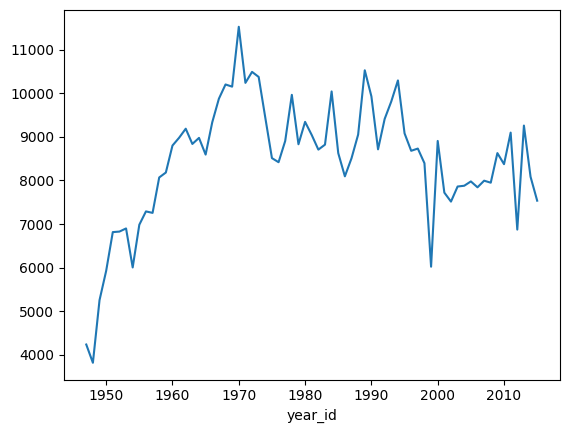

In [92]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

<AxesSubplot: >

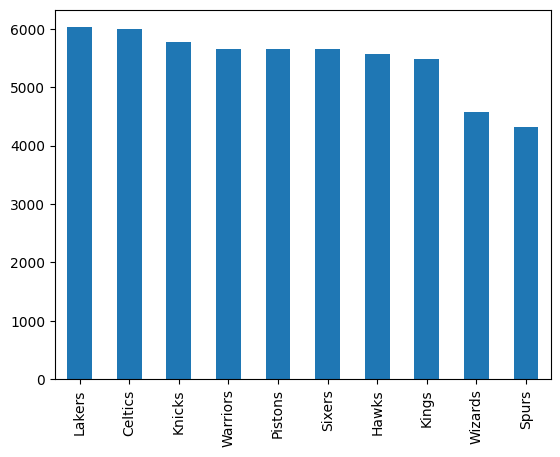

In [93]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

#### Exercise

In 2013, the Miami Heat won the championship. Create a pie plot showing the count of their wins and losses during that season.

## Conclusion and Further Resources